In [ ]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# ***Data Pre-processing***

In [ ]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
dataset.shape

(100000, 9)

In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

For 'gender' type

In [ ]:
pd.crosstab(dataset.diabetes, dataset.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


Droping 'other' type because few entry exists only.

In [ ]:
dataset=dataset[dataset['gender']!='Other']
dataset.shape

(99982, 9)

For 'hypertension' type

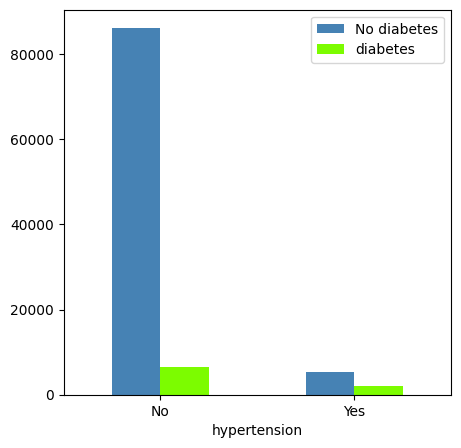

In [ ]:
ct1 = pd.crosstab(dataset.hypertension,dataset.diabetes)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(["No","Yes"])
ax1.legend(labels=['No diabetes', 'diabetes'])

For 'heart-disease' type

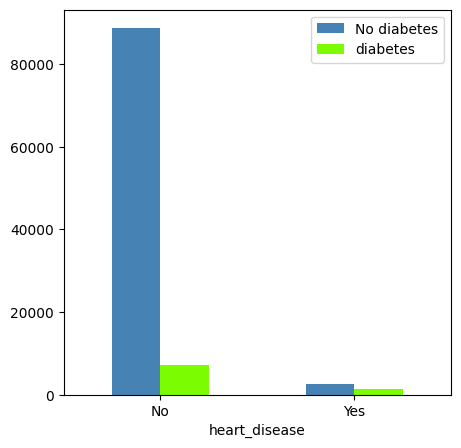

In [ ]:
ct1 = pd.crosstab(dataset.heart_disease,dataset.diabetes)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(["No","Yes"])
ax1.legend(labels=['No diabetes', 'diabetes'])

for 'smoking_status'

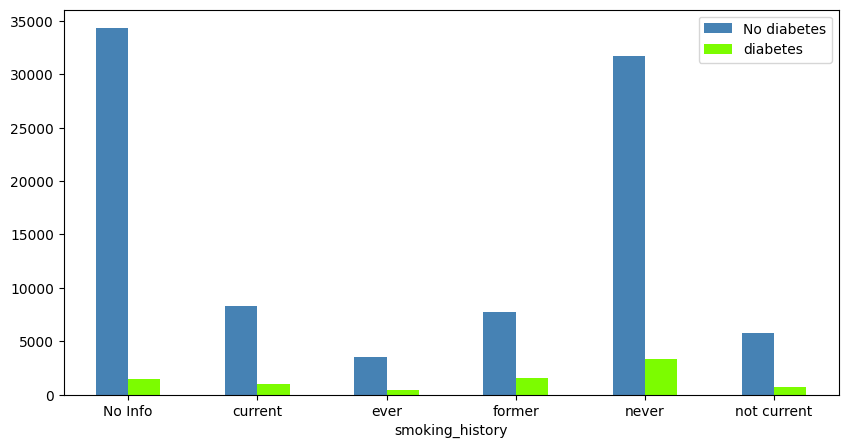

In [ ]:
ct1 = pd.crosstab(dataset.smoking_history,dataset.diabetes)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.legend(labels=['No diabetes', 'diabetes'])

no. of people of  various age, bmi, glucose level

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

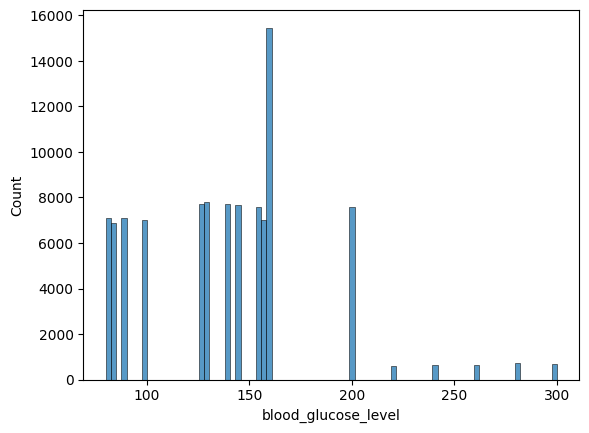

In [ ]:
sns.histplot(dataset['blood_glucose_level'])

<Axes: xlabel='HbA1c_level', ylabel='Count'>

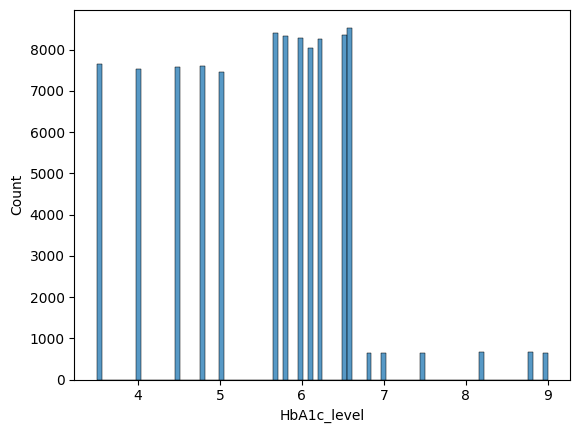

In [ ]:
sns.histplot(dataset['HbA1c_level'])

# ***Finding Null Values***

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
feature=['hypertension','heart_disease','smoking_history','bmi','HbA1c_level','diabetes','blood_glucose_level']
total=0
for i in feature:
  total+=dataset[i].isnull().sum()
print("Number of rows with null values in category_desc column: ", total)

Number of rows with null values in category_desc column:  0


# ***Deleting Null values***

In [ ]:
for i in feature:
  dataset = dataset[dataset[i].notna()]

In [ ]:
dataset.shape

(99982, 9)

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
feature=['hypertension','heart_disease','smoking_history','bmi','HbA1c_level','diabetes','blood_glucose_level']
total=0
for i in feature:
  total+=dataset[i].isnull().sum()
print("After update Number of rows with null values in category_desc column: ", total)

After update Number of rows with null values in category_desc column:  0


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
dataset['diabetes'].value_counts()
negative = len(dataset[dataset['diabetes'] == 0])
positive = len(dataset[dataset['diabetes'] == 1])
print ("Diabetes data ratio (Negative/Positive) : " + str(negative) +' / '+ str(positive))


Diabetes data ratio (Negative/Positive) : 91482 / 8500


One-hot encoding

In [ ]:
enc = LabelEncoder()

In [ ]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
dataset['gender'] = enc.fit_transform(dataset['gender'])
print(dataset['gender'])

0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 99982, dtype: int64


In [ ]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
dataset['smoking_history'] = enc.fit_transform(dataset['smoking_history'])
print(dataset['smoking_history'])

0        4
1        0
2        4
3        1
4        1
        ..
99995    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 99982, dtype: int64


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# ***Correlation Matrix***

In [ ]:
corr=dataset.corr()
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030369,0.014381,0.077886,-0.078255,-0.023023,0.020044,0.017196,0.037623
age,-0.030369,1.000000,0.251163,0.233352,0.228710,0.337378,0.101343,0.110679,0.257999
hypertension,0.014381,0.251163,1.000000,0.121253,0.093213,0.147679,0.080941,0.084436,0.197811
heart_disease,0.077886,0.233352,0.121253,1.000000,0.027618,0.061203,0.067591,0.070071,0.171718
smoking_history,-0.078255,0.228710,0.093213,0.027618,1.000000,0.179401,0.037313,0.040288,0.094328
bmi,-0.023023,0.337378,0.147679,0.061203,0.179401,1.000000,0.083017,0.091310,0.214377
HbA1c_level,0.020044,0.101343,0.080941,0.067591,0.037313,0.083017,1.000000,0.166831,0.400696
blood_glucose_level,0.017196,0.110679,0.084436,0.070071,0.040288,0.091310,0.166831,1.000000,0.419587
diabetes,0.037623,0.257999,0.197811,0.171718,0.094328,0.214377,0.400696,0.419587,1.000000


<Axes: >

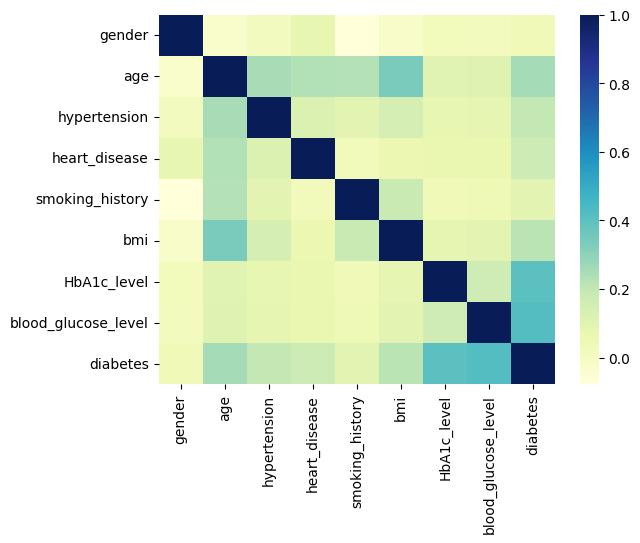

In [ ]:
sns.heatmap(corr,cmap='YlGnBu')

# ***Spliting Dataset***

In [ ]:
X = dataset.drop("diabetes", axis=1)
Y = dataset["diabetes"]

X.shape, Y.shape

((99982, 8), (99982,))

In [ ]:
# Creating a random seed to mix the data 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) 
 

In [ ]:
diabetes=len(Y_train==1)
no_diabetes=len(Y_train==0)
diabetes,no_diabetes

(69987, 69987)

In [ ]:
diabetes=len(Y_test==1)
no_diabetes=len(Y_test==0)
diabetes,no_diabetes

(29995, 29995)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
26716,0,50.0,0,0,0,27.32,5.7,140
53763,0,50.0,0,0,4,29.76,6.0,85
93688,1,47.0,0,0,5,27.32,3.5,80
79616,0,9.0,0,0,4,17.42,6.6,158
43890,0,24.0,0,0,0,25.59,6.1,140
...,...,...,...,...,...,...,...,...
75049,0,30.0,0,0,4,19.87,6.5,145
89689,0,80.0,1,0,4,34.13,6.8,140
52051,0,30.0,1,0,3,23.37,4.8,126
25348,0,48.0,0,0,3,28.57,6.2,160


In [ ]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
74539,0,67.00,0,0,5,27.16,5.7,85
29182,1,40.00,0,0,4,27.32,6.5,160
37345,0,2.00,0,0,0,16.13,4.5,100
11913,1,75.00,0,0,4,23.55,5.8,158
18685,0,79.00,0,0,0,36.15,4.8,90
...,...,...,...,...,...,...,...,...
53190,0,22.00,0,0,0,27.32,6.6,145
19229,0,24.00,1,0,4,27.32,6.6,200
2682,1,66.00,0,0,0,27.32,4.0,159
48513,1,1.56,0,0,0,27.32,6.0,90


In [ ]:
model_names = []
model_scores = []

In [ ]:
def confusion_matrix_plot(matrix, model_name):
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

# ***Decision Tree***

In [ ]:
#train
m1 = DecisionTreeClassifier(random_state=10)
m1.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#test
print(classification_report(Y_test, m1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27445
           1       0.70      0.74      0.72      2550

    accuracy                           0.95     29995
   macro avg       0.84      0.85      0.85     29995
weighted avg       0.95      0.95      0.95     29995



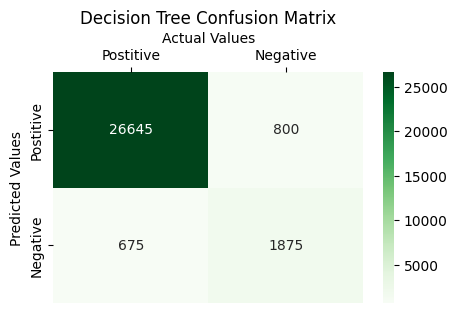

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m1.predict(X_test)), 'Decision Tree')

In [ ]:
model_names.append('Decision Tree')
model_scores.append(roc_auc_score(Y_test, m1.predict(X_test)))

# ***Random Forest***

In [ ]:
#train
m2 = RandomForestClassifier(random_state=10)
m2.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [ ]:
#test
print(classification_report(Y_test, m2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27445
           1       0.94      0.68      0.79      2550

    accuracy                           0.97     29995
   macro avg       0.96      0.84      0.89     29995
weighted avg       0.97      0.97      0.97     29995



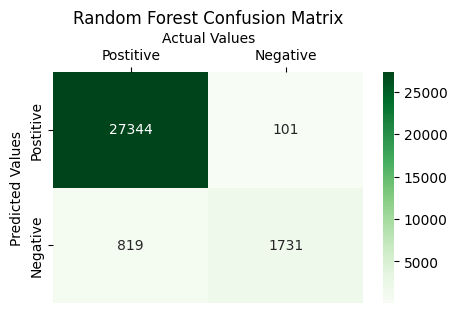

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m2.predict(X_test)), 'Random Forest')

In [ ]:
model_names.append('Random Forest')
model_scores.append(roc_auc_score(Y_test, m2.predict(X_test)))

# ***Xgboost***

In [ ]:
#train
m3 = XGBClassifier(random_state=10)
m3.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
#test
print(classification_report(Y_test, m3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27445
           1       0.95      0.69      0.80      2550

    accuracy                           0.97     29995
   macro avg       0.96      0.84      0.89     29995
weighted avg       0.97      0.97      0.97     29995



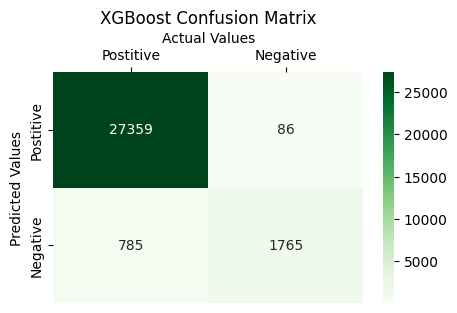

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m3.predict(X_test)), 'XGBoost')

In [ ]:
model_names.append('XGBoost')
model_scores.append(roc_auc_score(Y_test, m3.predict(X_test)))

<BarContainer object of 3 artists>

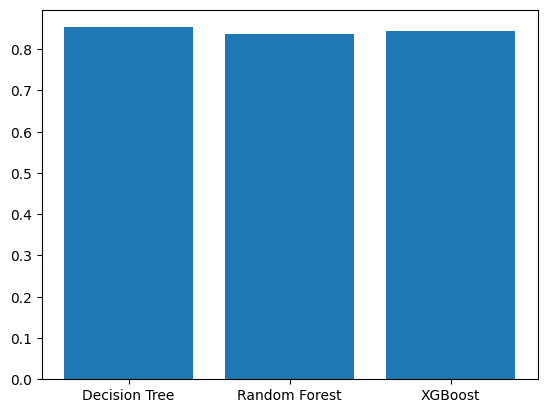

In [ ]:
plt.bar(model_names,model_scores)

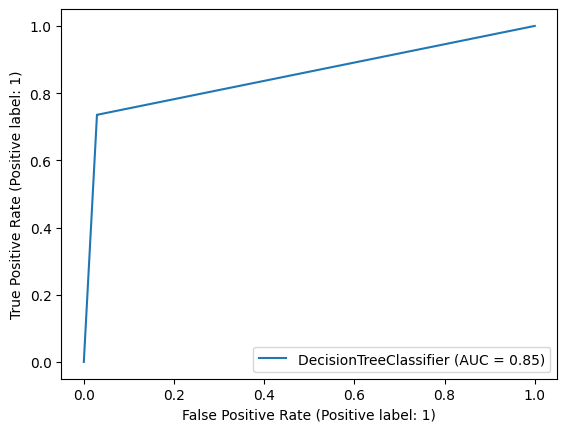

In [ ]:
fm = DecisionTreeClassifier(random_state=10)
fm.fit(X_train, Y_train)
Y_preds = fm.predict(X_test)
RocCurveDisplay.from_estimator(fm,X_test,Y_test);
